In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

### Целевой датасет 1000 Shows

[kaggle](https://www.kaggle.com/datasets/chasewillden/netflix-shows)

In [2]:
data = pd.read_excel('assets/NetflixShows.xlsx')
data = data.rename(columns={x:x.replace(' ', '_') for x in data.columns})
data = data.drop_duplicates()
data['dataset'] = 'small'
data.title = data.title.astype(str)
print(data.shape)
data.head()

(500, 8)


,title,rating,ratingLevel,ratingDescription,release_year,user_rating_score,user_rating_size,dataset
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,small
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82,small
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,small
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,small
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,small


### Дополнительный датасет на 5000 шоу (все до 2018)

[kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

In [3]:
df = pd.read_csv('assets/netflix_titles.csv')
df = df.query('release_year < 2018')
df.title = df.title.astype(str)
df['dataset'] = 'big'
print(df.shape)
df.head()

(5085, 13)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dataset
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",big
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,big
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,big
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",NaN,"September 21, 2021",1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...,big
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,big


## Насколько датасеты пересекаются?

In [4]:
outer = pd.merge(data[['title', 'release_year', 'rating', 'user_rating_score', 'dataset']],
                 df[['title', 'release_year', 'rating', 'type', 'dataset', 'director']],
                 on=['title', 'release_year'], 
                 how='outer', suffixes=['_small', '_big'])
outer['score_available'] = ~pd.isna(outer.user_rating_score)
outer.dataset_small = outer.dataset_small.fillna('')
outer.dataset_big = outer.dataset_big.fillna('')
outer['dataset'] = outer.dataset_small + outer.dataset_big
print(outer.shape)
outer.head()

(5439, 11)


,title,release_year,rating_small,user_rating_score,dataset_small,rating_big,type,dataset_big,director,score_available,dataset
0,#Rucker50,2016,NaN,NaN,,TV-PG,Movie,big,Robert McCullough Jr.,False,big
1,#Selfie,2014,NaN,NaN,,TV-MA,Movie,big,Cristina Jacob,False,big
2,#Selfie 69,2016,NaN,NaN,,TV-MA,Movie,big,Cristina Jacob,False,big
3,#realityhigh,2017,NaN,NaN,,TV-14,Movie,big,Fernando Lebrija,False,big
4,'76,2016,NaN,NaN,,TV-PG,Movie,big,Izu Ojukwu,False,big


In [5]:
outer.groupby('dataset').count()

,title,release_year,rating_small,user_rating_score,dataset_small,rating_big,type,dataset_big,director,score_available
dataset,,,,,,,,,,
big,4939,4939,0,0,4939,4935,4939,4939,3871,4939
small,354,354,354,194,354,0,0,354,0,354
smallbig,146,146,146,62,146,146,146,146,68,146


- всего 146 фильмов были доступны для просмотра на netflix в 2021 году из датасета 2017 года

In [6]:
outer.groupby(['dataset', 'score_available']).count()

title  release_year  rating_small  \
dataset  score_available                                      
big      False             4939          4939             0   
small    False              160           160           160   
         True               194           194           194   
smallbig False               84            84            84   
         True                62            62            62   

                          user_rating_score  dataset_small  rating_big  type  \
dataset  score_available                                                       
big      False                            0           4939        4935  4939   
small    False                            0            160           0     0   
         True                           194            194           0     0   
smallbig False                            0             84          84    84   
         True                            62             62          62    62   

                          dataset_big  director  
dataset  score_available                         
big      False                   4939      3871  
small    False                    160         0  
         True                     194         0  
smallbig False                     84        40  
         True                      62        28

- Оценки известны для 194 фильмов только в маленьком датасете и для 62 фильмов из обоих датасетов

# IMDb
Данные 2024 года для некоммерческого использования

[dataset](https://developer.imdb.com/non-commercial-datasets/)

Использованные файлы:
- `title.basics.tsv.gz`
- `title.ratings.tsv.gz`
- `title.crew.tsv.gz`
- `name.basics.tsv.gz`

In [7]:
%%time
basics = pd.read_csv('assets/title.basics.tsv.gz', sep='\t', na_values=['\\N'])
print(basics.shape)
basics.head()

<timed exec>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


(11404264, 9)
CPU times: total: 141 ms
Wall time: 22.8 s


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,Short


In [8]:
basics = basics.dropna(subset=['startYear'])
basics.primaryTitle = basics.primaryTitle.astype(str)
basics.startYear = basics.startYear.astype(int)
basics.shape

(9980867, 9)

In [9]:
ratings = pd.read_csv('assets/title.ratings.tsv.gz', sep='\t', na_values=['\\N'])
print(ratings.shape)
ratings.head()

(1526784, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,2118
1,tt0000002,5.6,286
2,tt0000003,6.4,2160
3,tt0000004,5.3,183
4,tt0000005,6.2,2886


In [10]:
%%time
crew = pd.read_csv('assets/title.crew.tsv.gz', sep='\t', na_values=['\\N'])
print(crew.shape)
crew.head()

(11405710, 3)
CPU times: total: 62.5 ms
Wall time: 9.66 s


,tconst,directors,writers
0,tt0000001,nm0005690,NaN
1,tt0000002,nm0721526,NaN
2,tt0000003,nm0721526,NaN
3,tt0000004,nm0721526,NaN
4,tt0000005,nm0005690,NaN


In [12]:
%%time
names = pd.read_csv('assets/name.basics.tsv.gz', sep='\t', na_values=['\\N'])
print(names.shape)
names.head()

(14124505, 6)
CPU times: total: 141 ms
Wall time: 24.6 s


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0043044"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976"


In [13]:
%%time
# неправильно работает в случае, когда режиссеров больше чем 1
# id режиссеров пересчилены через запятую, а в таблице с именами id один (это же id)
crew_names = pd.merge(crew, names, left_on='directors', right_on='nconst', how='left')
print(crew_names.shape)
crew_names.head()

(11405710, 9)
CPU times: total: 188 ms
Wall time: 13.8 s


,tconst,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000001,nm0005690,NaN,nm0005690,William K.L. Dickson,1860.0,1935.0,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
1,tt0000002,nm0721526,NaN,nm0721526,Émile Reynaud,1844.0,1918.0,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
2,tt0000003,nm0721526,NaN,nm0721526,Émile Reynaud,1844.0,1918.0,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
3,tt0000004,nm0721526,NaN,nm0721526,Émile Reynaud,1844.0,1918.0,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
4,tt0000005,nm0005690,NaN,nm0005690,William K.L. Dickson,1860.0,1935.0,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"


In [17]:
# пример, в 6 строке 2 режиссера
crew_names.iloc[5:7]

,tconst,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
5,tt0000006,nm0005690,NaN,nm0005690,William K.L. Dickson,1860.0,1935.0,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
6,tt0000007,"nm0005690,nm0374658",NaN,NaN,NaN,NaN,NaN,NaN,NaN


### объединение оценок IMDb с фильмами netflix

In [60]:
%%time
netflix_imdb = pd.merge(outer, basics, left_on=['title', 'release_year'], 
                        right_on=['primaryTitle', 'startYear'], how='left')
print(netflix_imdb.shape)
netflix_imdb.head()

(8125, 20)
CPU times: total: 15.6 ms
Wall time: 4.26 s


,title,release_year,rating_small,user_rating_score,dataset_small,rating_big,type,dataset_big,director,score_available,dataset,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,#Rucker50,2016,NaN,NaN,,TV-PG,Movie,big,Robert McCullough Jr.,False,big,tt6475636,movie,#Rucker50,#Rucker50,0.0,2016.0,NaN,56.0,Documentary
1,#Selfie,2014,NaN,NaN,,TV-MA,Movie,big,Cristina Jacob,False,big,tt3723840,short,#Selfie,#Selfie,0.0,2014.0,NaN,4.0,"Drama,Short"
2,#Selfie,2014,NaN,NaN,,TV-MA,Movie,big,Cristina Jacob,False,big,tt3760134,short,#Selfie,#Selfie,0.0,2014.0,NaN,8.0,"Biography,Documentary,History"
3,#Selfie,2014,NaN,NaN,,TV-MA,Movie,big,Cristina Jacob,False,big,tt3834890,short,#Selfie,#Selfie,0.0,2014.0,NaN,17.0,"Comedy,Music,Romance"
4,#Selfie 69,2016,NaN,NaN,,TV-MA,Movie,big,Cristina Jacob,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
netflix_imdb.titleType.unique()

array(['movie', 'short', nan, 'tvEpisode', 'tvSeries', 'tvSpecial',
       'tvMovie', 'tvMiniSeries', 'video', 'tvShort', 'videoGame'],
      dtype=object)

In [62]:
# слишком много удалилось, если фильтровать по типу видео из imdb

# target_type = ['movie', 'tvSeries', 'tvMiniSeries',
#        'tvSpecial', 'tvMovie']

# mask = netflix_imdb.titleType.isin(target_type)
# netflix_imdb = netflix_imdb.loc[mask]
# print(netflix_imdb.shape)
# netflix_imdb.head()

In [63]:
netflix_imdb.groupby(['title', 'release_year'])\
    .count().loc[np.any(netflix_imdb.groupby(['title', 'release_year']).count() > 1, axis=1)]

,,rating_small,user_rating_score,dataset_small,rating_big,type,dataset_big,director,score_available,dataset,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
title,release_year,,,,,,,,,,,,,,,,,,
#Selfie,2014,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3
13 Reasons Why,2017,3,3,3,0,0,3,0,3,3,3,3,3,3,3,3,1,1,3
16 Blocks,2006,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,1,2
1922,2017,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,1,2
2012,2009,0,0,5,5,5,5,5,5,5,5,5,5,5,5,5,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,2007,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,1,2
Zombieland,2009,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,0,2,4
Zoom,2006,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,1,2


In [64]:
netflix_imdb.query('title == "No Tomorrow"')

,title,release_year,rating_small,user_rating_score,dataset_small,rating_big,type,dataset_big,director,score_available,dataset,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4572,No Tomorrow,2016,TV-14,NaN,small,TV-PG,TV Show,big,NaN,False,smallbig,tt5595688,tvSeries,No Tomorrow,No Tomorrow,0.0,2016.0,2017.0,43.0,"Comedy,Drama,Romance"
4573,No Tomorrow,2016,TV-14,NaN,small,TV-PG,TV Show,big,NaN,False,smallbig,tt6333380,movie,No Tomorrow,Seom. Sa-ra-jin sa-ram-deul,0.0,2016.0,NaN,88.0,"Crime,Drama,Mystery"
4574,No Tomorrow,2016,TV-14,NaN,small,TV-PG,TV Show,big,NaN,False,smallbig,tt6449598,movie,No Tomorrow,No Tomorrow,0.0,2016.0,NaN,NaN,NaN


# TODO как выбрать правильный фильм?

Если `keep=False`, то 

In [65]:
# количество строк с неуникальными названиями
netflix_imdb[['title', 'release_year']].duplicated(keep=False).sum()

np.int64(3640)

In [66]:
# оставить только уникальные

netflix_imdb = netflix_imdb.loc[~netflix_imdb[['title', 'release_year']].duplicated(keep=False)]
netflix_imdb.shape

(4485, 20)

In [67]:
netflix_imdb.groupby(['title', 'release_year'])\
    .count().loc[np.any(netflix_imdb.groupby(['title', 'release_year']).count() > 1, axis=1)]

,,rating_small,user_rating_score,dataset_small,rating_big,type,dataset_big,director,score_available,dataset,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
title,release_year,,,,,,,,,,,,,,,,,,


# Объединение с таблицей с оценками IMDb

In [68]:
netflix_imdb = pd.merge(netflix_imdb, ratings, on='tconst', how='left')
print(netflix_imdb.shape)
netflix_imdb.head()

(4485, 22)


,title,release_year,rating_small,user_rating_score,dataset_small,rating_big,type,dataset_big,director,score_available,dataset,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,#Rucker50,2016,NaN,NaN,,TV-PG,Movie,big,Robert McCullough Jr.,False,big,tt6475636,movie,#Rucker50,#Rucker50,0.0,2016.0,NaN,56.0,Documentary,5.2,140.0
1,#Selfie 69,2016,NaN,NaN,,TV-MA,Movie,big,Cristina Jacob,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#realityhigh,2017,NaN,NaN,,TV-14,Movie,big,Fernando Lebrija,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'76,2016,NaN,NaN,,TV-PG,Movie,big,Izu Ojukwu,False,big,tt2385126,movie,'76,'76,0.0,2016.0,NaN,118.0,"Drama,Romance",5.5,298.0
4,'89,2017,NaN,NaN,,TV-PG,Movie,big,NaN,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'rating, IMDb 2024')

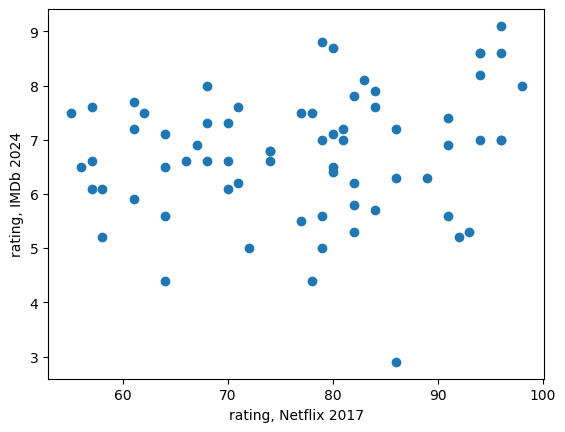

In [69]:
fig, ax = plt.subplots()

ax.scatter(netflix_imdb.user_rating_score, netflix_imdb.averageRating)

ax.set_xlabel('rating, Netflix 2017')
ax.set_ylabel('rating, IMDb 2024')

In [70]:
netflix_imdb[['user_rating_score', 'averageRating']].corr()

,user_rating_score,averageRating
user_rating_score,1.000000,0.179742
averageRating,0.179742,1.000000


 - Нет корреляции между рейтингом netflix из маленького датасета и оценкой imdb
 - Вероятно, это из-за того, что рейтинг персонализированный (особенность рекомендательной систему netflix 2016 года)

# Добавление информации о режиссере

In [71]:
netflix_imdb = pd.merge(netflix_imdb, crew_names, on='tconst', how='left')
print(netflix_imdb.shape)
netflix_imdb.head()

(4485, 30)


,title,release_year,rating_small,user_rating_score,dataset_small,rating_big,type,dataset_big,director,score_available,dataset,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,#Rucker50,2016,NaN,NaN,,TV-PG,Movie,big,Robert McCullough Jr.,False,big,tt6475636,movie,#Rucker50,#Rucker50,0.0,2016.0,NaN,56.0,Documentary,5.2,140.0,nm2346384,"nm2346384,nm1394485",nm2346384,Robert McCullough Jr.,NaN,NaN,"miscellaneous,producer,director","tt6475636,tt8326986,tt0833989,tt0108927"
1,#Selfie 69,2016,NaN,NaN,,TV-MA,Movie,big,Cristina Jacob,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#realityhigh,2017,NaN,NaN,,TV-14,Movie,big,Fernando Lebrija,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'76,2016,NaN,NaN,,TV-PG,Movie,big,Izu Ojukwu,False,big,tt2385126,movie,'76,'76,0.0,2016.0,NaN,118.0,"Drama,Romance",5.5,298.0,nm2339266,NaN,nm2339266,Izu Ojukwu,NaN,NaN,"director,cinematographer,editor","tt2385126,tt1045659,tt1300328,tt15710998"
4,'89,2017,NaN,NaN,,TV-PG,Movie,big,NaN,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
dff = netflix_imdb.loc[(netflix_imdb.director == netflix_imdb.primaryName) | (netflix_imdb.dataset == 'small')]
dff.shape

(2132, 30)

Text(0, 0.5, 'rating, IMDb 2024')

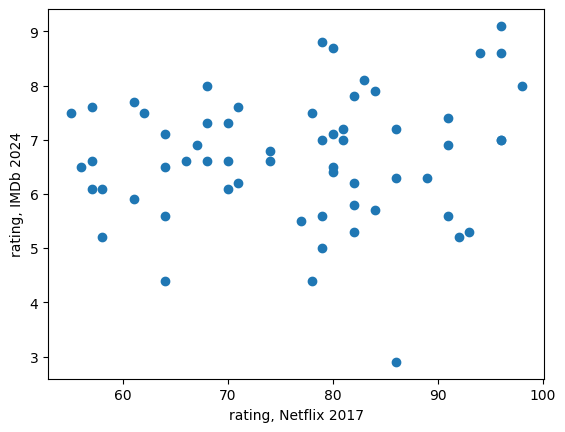

In [73]:
fig, ax = plt.subplots()

ax.scatter(dff.user_rating_score, dff.averageRating)

ax.set_xlabel('rating, Netflix 2017')
ax.set_ylabel('rating, IMDb 2024')

In [74]:
print(netflix_imdb.shape)
netflix_imdb.head()

(4485, 30)


,title,release_year,rating_small,user_rating_score,dataset_small,rating_big,type,dataset_big,director,score_available,dataset,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,#Rucker50,2016,NaN,NaN,,TV-PG,Movie,big,Robert McCullough Jr.,False,big,tt6475636,movie,#Rucker50,#Rucker50,0.0,2016.0,NaN,56.0,Documentary,5.2,140.0,nm2346384,"nm2346384,nm1394485",nm2346384,Robert McCullough Jr.,NaN,NaN,"miscellaneous,producer,director","tt6475636,tt8326986,tt0833989,tt0108927"
1,#Selfie 69,2016,NaN,NaN,,TV-MA,Movie,big,Cristina Jacob,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#realityhigh,2017,NaN,NaN,,TV-14,Movie,big,Fernando Lebrija,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'76,2016,NaN,NaN,,TV-PG,Movie,big,Izu Ojukwu,False,big,tt2385126,movie,'76,'76,0.0,2016.0,NaN,118.0,"Drama,Romance",5.5,298.0,nm2339266,NaN,nm2339266,Izu Ojukwu,NaN,NaN,"director,cinematographer,editor","tt2385126,tt1045659,tt1300328,tt15710998"
4,'89,2017,NaN,NaN,,TV-PG,Movie,big,NaN,False,big,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
netflix_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4485 non-null   object 
 1   release_year       4485 non-null   int64  
 2   rating_small       404 non-null    object 
 3   user_rating_score  190 non-null    float64
 4   dataset_small      4485 non-null   object 
 5   rating_big         4199 non-null   object 
 6   type               4203 non-null   object 
 7   dataset_big        4485 non-null   object 
 8   director           3166 non-null   object 
 9   score_available    4485 non-null   bool   
 10  dataset            4485 non-null   object 
 11  tconst             2918 non-null   object 
 12  titleType          2918 non-null   object 
 13  primaryTitle       2918 non-null   object 
 14  originalTitle      2918 non-null   object 
 15  isAdult            2918 non-null   float64
 16  startYear          2918 

In [76]:
# для скольких фильмов из маленького датасета добавилась информация из imdb
(netflix_imdb.dataset_small.astype(bool) & netflix_imdb.tconst.astype(bool)).sum()

np.int64(404)

In [77]:
# для скольких фильмов из большого датасета добавилась информация из imdb
(netflix_imdb.dataset_big.astype(bool) & netflix_imdb.tconst.astype(bool)).sum()

np.int64(4203)

In [78]:
netflix_imdb.to_csv('assets/netflix_movies_with_imdb.tsv', sep='\t', index=False)

- `title` название фильма
- `release_year` год выпуска
- `rating_small`возрастной рейтинг из маленького целевого датасета
- `user_rating_score` пользовательская оценка из маленького датасета
- `dataset_small` имеет значение small, если фильм с таким названием и годом выпуска есть в маленьком датасете
- `rating_big` возрастной рейтинг из большого датасета
- `type` тип видео из большого датасета
- `dataset_big` имеет значение big, если фильм с таким названием и годом выпуска есть большом датасете
- `director` режиссер из большого датасета
- `score_available` true или false, есть ли пользовательская оценка из маленького датасета
- `dataset` small -только в маленьком датасете, big только в большом, smallbig  в обоих
- `tconst` id фильма в imdb 
- `titleType` тип видео, imdb
- `primaryTitle` название фильма, imdb
- `originalTitle` название фильма на оригинальном языке, imdb
- `isAdult` 0 или 1, imdb
- `startYear` год выпуска, imdb
- `endYear` дата окончания, если применимо, imdb
- `runtimeMinutes` primary runtime of the title, in minutes, imdb
- `genres`  includes up to three genres associated with the title, imdb
- `averageRating` weighted average of all the individual user ratings, imdb
- `numVotes` number of votes the title has received, imdb
- `directors` director(s) of the given title, imdb
- `writers`  writer(s) of the given title, imdb
- `nconst` id режиссера в imdb
- `primaryName` имя режиссера, name by which the person is most often credited
- `birthYear` год рождения режиссера
- `deathYear` год смерти режиссера
- `primaryProfession` the top-3 professions of the person (режиссера)
- `knownForTitles` список id фильмов в базе imdb известных работ режиссера

# Выводы

- должно быть что-то вроде uuid. В исходном датасете есть название и год выпуска, но этого недостаточно, чтобы однозначно определить фильм. Из-за этого возникают лишние строки, из которых неясно, как выбрать правильные
- список фильмов, доступных на netflix в 2017 году, поменялся по сравнению с 2021 годом, но в IMDb есть информация об этих фильмах
- датасет IMDb хороший, его можно давать студентам 

# Ограничения работы

- если режиссеров больше чем один, то информация о режиссере не добавляется
- есть фильмы с одинаковым названиями, неизвестно, какой был доступен в netflix в 2017 или 2021 году
- данные из IMDb 2024 года, а не 2017 или 2021
- маленький датасет это какой-то срез в 2017 году, этот срез не является подмножеством фильмов, доступных в 2021 году, вероятно, из-за сроков лицензий
- в маленьком датасете не для всех фильмов доступен рейтинг, вероятно, что этот фильм уже не был доступен к просмотру, но netflix его рекомендовал
- вероятно, в маленьком датасете оценки пользователей это персонализированные оценки, не абсолютные.